In [ ]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets

     |████████████████████████████████| 76.3 MB 1.9 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_csv_link = '/content/drive/MyDrive/nsu-abmd-2021-e-commerce/train.csv'

In [ ]:
test_csv_link = '/content/drive/MyDrive/nsu-abmd-2021-e-commerce/test.csv'

In [ ]:
submission_csv_link = '/content/drive/MyDrive/nsu-abmd-2021-e-commerce/submission_example.csv'

In [ ]:
import pandas as pd


df = pd.read_csv(train_csv_link)

df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Name  ... Sales
0             Сменный аэрозоль AirWick Дикий Гранат 250мл  ...   1.0
1       Фигурка декоративная Pavone Ангел  JP-05/ 6, 1...  ...   1.0
2       Фенугрек/Пажитник молотый (Fenugreek (Methi) P...  ...  13.0
3           Пазл Castorland 1000 деталей: Ожившая картина  ...   3.0
4                      SIKU Самосвал Liebherr T 264, 1:87  ...   1.0
...                                                   ...  ...   ...
751769                          Кольцо SOKOLOV из серебра  ...   0.0
751770                      Супница Mayer & Boch, 1000 мл  ...   2.0
751771  Моющее средство для посуды в посудомоечной машине  ...   1.0
751772                           Босоножки Tommy Hilfiger  ...   1.0
751773                   Толстовка adidas Juve 3S Trk Top  ...   2.0

[751774 rows x 13 columns]

In [ ]:
dfs = pd.read_csv(submission_csv_link)

dfs

Id  Expected
0          0         4
1          1         6
2          2         1
3          3         1
4          4         4
5          5         0
6          6         4
7          7         4
8          8         7
9          9         0
10        10         2
11        11         0
...      ...       ...
83519  83519         8
83520  83520         0
83521  83521         2
83522  83522         1
83523  83523         7
83524  83524         8
83525  83525         4
83526  83526         1
83527  83527         7
83528  83528         7
83529  83529         3
83530  83530         8

[83531 rows x 2 columns]

In [ ]:
dft = pd.read_csv(test_csv_link)

dft

Id  ... Days in stock
0          0  ...          29.0
1          1  ...          27.0
2          2  ...          15.0
3          3  ...          15.0
4          4  ...           4.0
5          5  ...           6.0
6          6  ...          31.0
7          7  ...          31.0
8          8  ...          20.0
9          9  ...          10.0
10        10  ...          31.0
11        11  ...          31.0
...      ...  ...           ...
83519  83519  ...          28.0
83520  83520  ...           0.0
83521  83521  ...          16.0
83522  83522  ...          26.0
83523  83523  ...           1.0
83524  83524  ...          18.0
83525  83525  ...          27.0
83526  83526  ...          29.0
83527  83527  ...          15.0
83528  83528  ...          10.0
83529  83529  ...          30.0
83530  83530  ...           2.0

[83531 rows x 13 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751774 entries, 0 to 751773
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Name            751774 non-null  object 
 1   Category        751774 non-null  object 
 2   Brand           700066 non-null  object 
 3   Seller          751774 non-null  object 
 4   Deliveryscheme  751774 non-null  object 
 5   Comments        751774 non-null  int64  
 6   Rating          751774 non-null  object 
 7   Price           751774 non-null  float64
 8   Max price       751774 non-null  float64
 9   Min price       751774 non-null  float64
 10  Average price   683438 non-null  float64
 11  Days in stock   751774 non-null  object 
 12  Sales           751774 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 74.6+ MB


In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83531 entries, 0 to 83530
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              83531 non-null  int64  
 1   Name            83531 non-null  object 
 2   Category        83531 non-null  object 
 3   Brand           77602 non-null  object 
 4   Seller          83531 non-null  object 
 5   Deliveryscheme  83531 non-null  object 
 6   Comments        83531 non-null  int64  
 7   Rating          83531 non-null  object 
 8   Price           83531 non-null  float64
 9   Max price       83531 non-null  float64
 10  Min price       83531 non-null  float64
 11  Average price   75931 non-null  float64
 12  Days in stock   83531 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 8.3+ MB


In [ ]:
df.describe()

Comments         Price  ...  Average price          Sales
count  751774.000000  7.517740e+05  ...   6.834380e+05  751774.000000
mean       12.197287  3.352784e+03  ...   3.232221e+03      21.514135
std       146.673229  6.022085e+04  ...   5.949829e+04      99.855354
min         0.000000  0.000000e+00  ...   0.000000e+00       0.000000
25%         0.000000  4.970000e+02  ...   4.810000e+02       1.000000
50%         0.000000  1.031000e+03  ...   9.990000e+02       3.000000
75%         1.000000  2.490000e+03  ...   2.394000e+03      10.000000
max     20224.000000  3.442755e+07  ...   3.442755e+07    4237.000000

[8 rows x 6 columns]

In [ ]:
df.describe(include='O')

Name  ... Days in stock
count          751774  ...      751774.0
unique         582878  ...          99.0
top     Футболка ТВОЕ  ...          31.0
freq              920  ...      121488.0

[4 rows x 7 columns]

In [ ]:
df.Rating = df.Rating.str.replace(',', '.').astype(float)

In [ ]:
dft.Rating = dft.Rating.str.replace(',', '.').astype(float)

In [ ]:
df.isna().any()

Name              False
Category          False
Brand              True
Seller            False
Deliveryscheme    False
Comments          False
Rating            False
Price             False
Max price         False
Min price         False
Average price      True
Days in stock     False
Sales             False
dtype: bool

In [ ]:
dft.isna().any()

Id                False
Name              False
Category          False
Brand              True
Seller            False
Deliveryscheme    False
Comments          False
Rating            False
Price             False
Max price         False
Min price         False
Average price      True
Days in stock     False
dtype: bool

In [ ]:
df = df[~pd.to_numeric(df['Days in stock'], errors='coerce').isna()]

In [ ]:
dft = dft[~pd.to_numeric(dft['Days in stock'], errors='coerce').isna()]

In [ ]:
df['Days in stock'] = df['Days in stock'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dft['Days in stock'] = dft['Days in stock'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751771 entries, 0 to 751773
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Name            751771 non-null  object 
 1   Category        751771 non-null  object 
 2   Brand           700063 non-null  object 
 3   Seller          751771 non-null  object 
 4   Deliveryscheme  751771 non-null  object 
 5   Comments        751771 non-null  int64  
 6   Rating          751771 non-null  float64
 7   Price           751771 non-null  float64
 8   Max price       751771 non-null  float64
 9   Min price       751771 non-null  float64
 10  Average price   683435 non-null  float64
 11  Days in stock   751771 non-null  float64
 12  Sales           751771 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 80.3+ MB


In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83531 entries, 0 to 83530
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              83531 non-null  int64  
 1   Name            83531 non-null  object 
 2   Category        83531 non-null  object 
 3   Brand           77602 non-null  object 
 4   Seller          83531 non-null  object 
 5   Deliveryscheme  83531 non-null  object 
 6   Comments        83531 non-null  int64  
 7   Rating          83531 non-null  float64
 8   Price           83531 non-null  float64
 9   Max price       83531 non-null  float64
 10  Min price       83531 non-null  float64
 11  Average price   75931 non-null  float64
 12  Days in stock   83531 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 8.9+ MB


Количественный

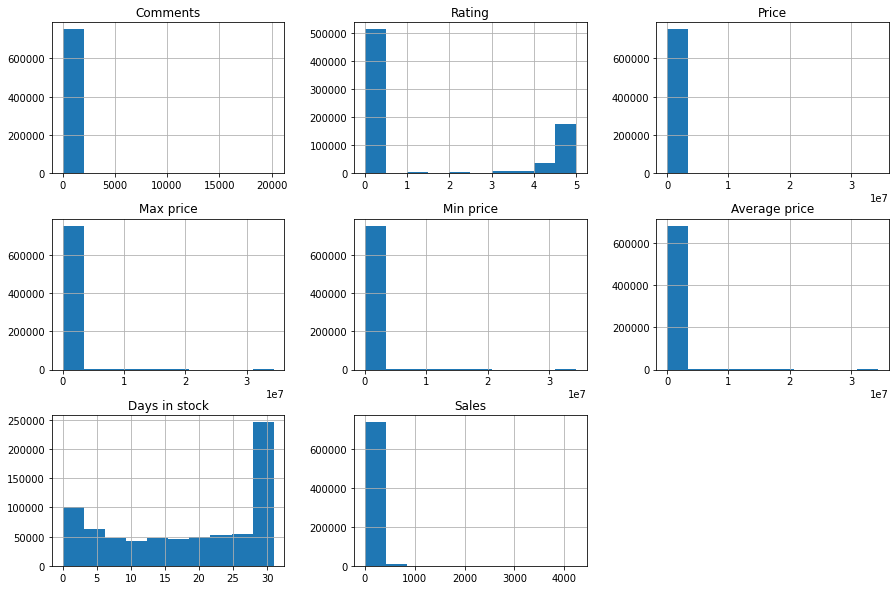

In [ ]:
df.hist(figsize=(15, 10));

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


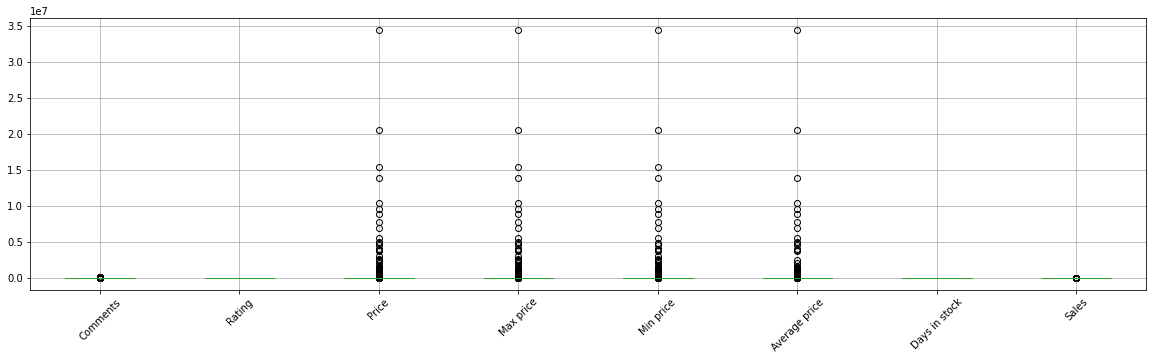

In [ ]:
df.boxplot(figsize=(20, 5), rot=45);

In [ ]:
df[df.Comments>2_000] #Price

Name  ...  Sales
223     Кофе в капсулах Nescafe Dolce Gusto Cappuccino...  ...    8.0
2381            Батарейки щелочные Duracell АА/LR6, 12 шт  ...  122.0
3837          Dove Антиперспирант-спрей Невидимый, 150 мл  ...   19.0
5861         Косметическое мыло Чистая линия "Мята", 90 г  ...    3.0
6874             Батарейки щелочные Duracell C/LR14, 2 шт  ...  224.0
...                                                   ...  ...    ...
743783       Кресло-мешок MyPuff Груша, Оксфорд, Размер M  ...   10.0
744246  Nivea Вишневое сияние Бальзам для губ, маслами...  ...  567.0
746685  Туалетная бумага Zewa Deluxe с ароматом ромашк...  ...    1.0
750553  Крем-гель для душа бессульфатный Dove Объятия ...  ...   18.0
751753  Простыня Селтекс  ТПР Трикотаж, 120x200, баклажан  ...    2.0

[544 rows x 13 columns]

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
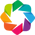

:DynamicMap   [x]
   :BoxWhisker   (y)

In [ ]:
import holoviews as hv
from holoviews import dim
from holoviews import opts
hv.extension('bokeh')


opts.defaults(opts.BoxWhisker(height=120, responsive=True, toolbar='above', invert_axes=True, tools=['hover']))

def f(x):
    return hv.BoxWhisker(df[x])

hv.DynamicMap(f, kdims=['x']).redim.values(x=df.select_dtypes('number').columns)

категориальные

In [ ]:
df.select_dtypes('O')

Name  ... Deliveryscheme
0             Сменный аэрозоль AirWick Дикий Гранат 250мл  ...            FBS
1       Фигурка декоративная Pavone Ангел  JP-05/ 6, 1...  ...            FBO
2       Фенугрек/Пажитник молотый (Fenugreek (Methi) P...  ...            FBS
3           Пазл Castorland 1000 деталей: Ожившая картина  ...            FBS
4                      SIKU Самосвал Liebherr T 264, 1:87  ...            FBS
...                                                   ...  ...            ...
751769                          Кольцо SOKOLOV из серебра  ...            FBS
751770                      Супница Mayer & Boch, 1000 мл  ...         Retail
751771  Моющее средство для посуды в посудомоечной машине  ...            FBS
751772                           Босоножки Tommy Hilfiger  ...            FBS
751773                   Толстовка adidas Juve 3S Trk Top  ...         Retail

[751771 rows x 5 columns]

In [ ]:
import numpy as np


pd.set_option('min_rows', 25)
np.set_printoptions(edgeitems=100)

In [ ]:
for i in df.select_dtypes('O').columns:
    print(i, df[i].unique())

Name ['Сменный аэрозоль AirWick Дикий Гранат 250мл'
 'Фигурка декоративная Pavone Ангел  JP-05/ 6, 102470'
 'Фенугрек/Пажитник молотый (Fenugreek (Methi) Powder),Золото Индии,1 кг'
 'Пазл Castorland 1000 деталей: Ожившая картина'
 'SIKU Самосвал Liebherr T 264, 1:87'
 'Мини видеокамера SQ8 Mini Full HD 2'
 'Японские опыты Науки с Буки BONDIBON, Космический проектор, арт.196440'
 'Ботинки NNN TISA SPORT LADY S80519, 39'
 'Парта Трансформер Астек Лидер с ящиком и надстройкой, 120х72х78 см'
 'Скатерть Deskdecor 130x80см' 'Триммер аккумуляторный Greenworks 40В'
 'Обучающая игра "Скорость цвета", 25,5*6,5*25,5 см'
 'Принтер механический Omega, клавиатура - кириллица, в блистере'
 'Алмазная мозаика "Бассет-хаунд", 20х25см'
 'Стержень для шариковой ручки класса LUXE и BUSINESS Pierre Cardin черный, M,PC-310P-01'
 'Контейнер пищевой InterDesign'
 'Бизне-тетрадь Attache Selection Spiral Book, формат А4, в клетку, 737335, салатовый, 140 листов'
 'Organic Shop Kitchen Масло густое для тела рассла

In [ ]:
for i in dft.select_dtypes('O').columns:
    print(i, dft[i].unique())

Name ['Настольная лампа DIRITTA SL187.104.01'
 'Основа для вязания, донышки для корзинок. Набор для вязания из 3 изделий Бочонок 20*25 см.'
 'Бумага для акварели А3 10 листов'
 'Умный блокнот CashBook " Коплю на сладкую жизнь"' 'Водолазка KANZLER'
 'Чемодан Polar, Пластик, 74 см, 91 л'
 'Замок врезной электромеханический 12.011.59'
 'OLLIN PROFESSIONAL Крем-краска PERFORMANCE для окрашивания волос 0/11 корректор пепельный 60 мл'
 'Провод аккумуляторной батареи, с наконечниками диам. 8 мм, L 500 мм, "+"'
 'Хлопья из спельты цельнозерновые (без термической обработки) 3шт по 350гр'
 'Серьги Аргумент из серебра с фианитом и нано изумрудом'
 'Ковер DECOR MAGIC BRIZ, 2х1.35 м' 'Кардиган GREG aus Russland'
 'Прокладки Always Ultra normal plus, комплект: 2 упаковки'
 'Набор автомобилиста AVS AN-03' 'Видеорегистратор Cansonic Z1 Dual,'
 'Ремень Dr.Koffer' 'Джемпер Scandica'
 'Матрац пеленальный Ceba Baby 70*50 см мягкий на комод Lolly Polly Peacock W-143-120-608'
 'Портьера Amore Mio RR Y115-17

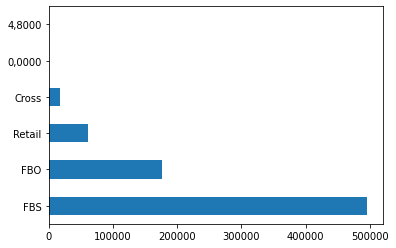

In [ ]:
df.Deliveryscheme.value_counts(dropna=False).plot.barh();

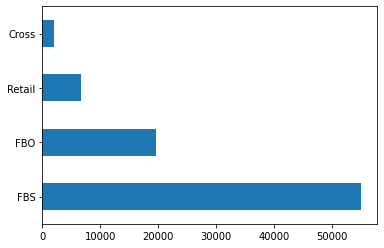

In [ ]:
dft.Deliveryscheme.value_counts(dropna=False).plot.barh();

In [ ]:
df = pd.concat([df, df.Category.str.split('/', expand=True)\
                .rename(columns={0: 'cat_meta', 1: 'cat_sub', 2: 'cat_sub_sub'})], axis=1)

df

Name  ...     8
0             Сменный аэрозоль AirWick Дикий Гранат 250мл  ...  None
1       Фигурка декоративная Pavone Ангел  JP-05/ 6, 1...  ...  None
2       Фенугрек/Пажитник молотый (Fenugreek (Methi) P...  ...  None
3           Пазл Castorland 1000 деталей: Ожившая картина  ...  None
4                      SIKU Самосвал Liebherr T 264, 1:87  ...  None
5                     Мини видеокамера SQ8 Mini Full HD 2  ...  None
6       Японские опыты Науки с Буки BONDIBON, Космичес...  ...  None
7                  Ботинки NNN TISA SPORT LADY S80519, 39  ...  None
8       Парта Трансформер Астек Лидер с ящиком и надст...  ...  None
9                             Скатерть Deskdecor 130x80см  ...  None
10                  Триммер аккумуляторный Greenworks 40В  ...  None
11      Обучающая игра "Скорость цвета", 25,5*6,5*25,5 см  ...  None
...                                                   ...  ...   ...
751762  Маркер Sketchmarker Brush двухсторонний на спи...  ...  None
751763  Набор кастрюль Zigen, Нержавеющая сталь, 4 л, ...  ...  None
751764  крафт пакет с прослойкой 14*22 см, 20 штук в у...  ...  None
751765  Трос стояночного тормоза chevrolet lacetti nsp...  ...  None
751766                             Чемодан детский, 45 см  ...  None
751767  Портативный ирригатор для очистки полости рта ...  ...  None
751768  Чехол на подушку в этническом стиле с помпонам...  ...  None
751769                          Кольцо SOKOLOV из серебра  ...  None
751770                      Супница Mayer & Boch, 1000 мл  ...  None
751771  Моющее средство для посуды в посудомоечной машине  ...  None
751772                           Босоножки Tommy Hilfiger  ...  None
751773                   Толстовка adidas Juve 3S Trk Top  ...  None

[751774 rows x 22 columns]

In [ ]:
dft = pd.concat([dft, dft.Category.str.split('/', expand=True)\
                .rename(columns={0: 'cat_meta', 1: 'cat_sub', 2: 'cat_sub_sub'})], axis=1)

dft

Id                                               Name  ...     6     7
0          0              Настольная лампа DIRITTA SL187.104.01  ...  None  None
1          1  Основа для вязания, донышки для корзинок. Набо...  ...  None  None
2          2                   Бумага для акварели А3 10 листов  ...  None  None
3          3   Умный блокнот CashBook " Коплю на сладкую жизнь"  ...  None  None
4          4                                  Водолазка KANZLER  ...  None  None
5          5                Чемодан Polar, Пластик, 74 см, 91 л  ...  None  None
6          6        Замок врезной электромеханический 12.011.59  ...  None  None
7          7  OLLIN PROFESSIONAL Крем-краска PERFORMANCE для...  ...  None  None
8          8  Провод аккумуляторной батареи, с наконечниками...  ...  None  None
9          9  Хлопья из спельты цельнозерновые (без термичес...  ...  None  None
10        10  Серьги Аргумент из серебра с фианитом и нано и...  ...  None  None
11        11                   Ковер DECOR MAGIC BRIZ, 2х1.35 м  ...  None  None
...      ...                                                ...  ...   ...   ...
83519  83519                          Резинка для волос LAVISCO  ...  None  None
83520  83520         Переноска для кошек и собак "Чистый котик"  ...  None  None
83521  83521              Корзина сцепления - VALEO арт. 358217  ...  None  None
83522  83522  Цепь для привязи собак, 3 м, калибр 3*16 мм, б...  ...  None  None
83523  83523  Беспроводная зарядка для телефона быстрая Base...  ...  None  None
83524  83524  Органайзер настольный с 3 выкатными ящичками 3...  ...  None  None
83525  83525                                   Джемпер Richcoco  ...  None  None
83526  83526              Milan / Ластик-точилка "Super Heroes"  ...  None  None
83527  83527  Тетрадь InFolio А5, 120 листов, клетка, кольца...  ...  None  None
83528  83528               Набор столовых приборов Xiaomi, 4 шт  ...  None  None
83529  83529     Бензонасос электрический - KRAUF арт. LR201216  ...  None  None
83530  83530                               Бюстгальтер Michelle  ...  None  None

[83531 rows x 21 columns]

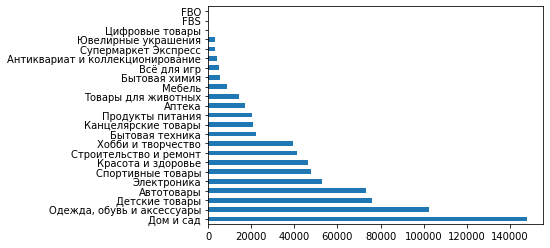

In [ ]:
df.cat_meta.value_counts(dropna=False).plot.barh();

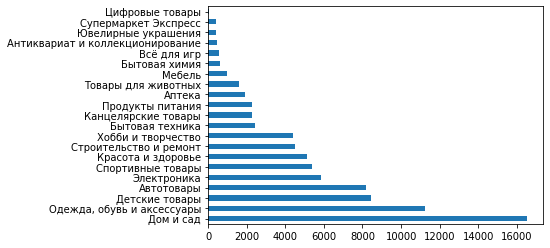

In [ ]:
dft.cat_meta.value_counts(dropna=False).plot.barh();

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


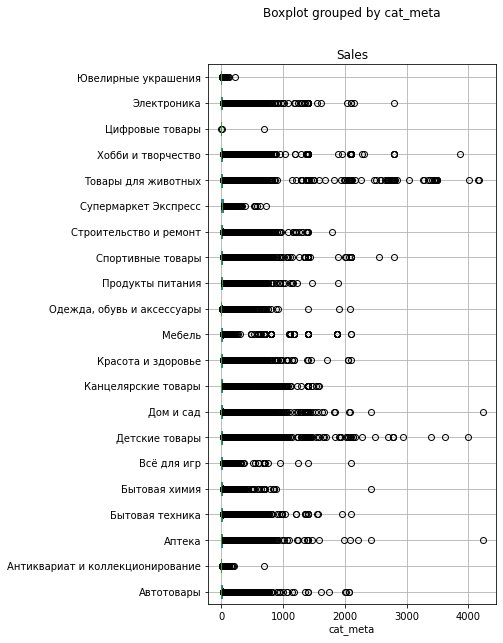

In [ ]:
df.boxplot(column='Sales', by='cat_meta', figsize=(5, 10), vert=False);

In [ ]:
df.cat_sub.value_counts(dropna=False)

Женщинам                              47739
Игрушки и игры                        42053
Посуда                                37761
Текстиль                              29411
Мужчинам                              26465
Детям                                 21276
Автозапчасти                          19919
Освещение                             19831
Каталог ТО                            18337
Товары для праздников                 16565
Декор и интерьер                      15094
Телефоны и смарт-часы                 14843
                                      ...  
Детская косметика                         4
Очки виртуальной реальности               4
Винтажная галантерея                      3
Зажимы                                    3
Запонки                                   3
Карандаши для чистки утюгов               3
Подписки на обучение                      1
Заколки для волос                         1
Изготовление игрушек                      1
Электронные подарочные сертифика

In [ ]:
dft.cat_sub.value_counts(dropna=False)

Женщинам                       5332
Игрушки и игры                 4644
Посуда                         4185
Текстиль                       3293
Мужчинам                       2873
Детям                          2299
Автозапчасти                   2235
Освещение                      2108
Каталог ТО                     2057
Товары для праздников          1855
Декор и интерьер               1701
Телефоны и смарт-часы          1664
                               ... 
Рыба, морепродукты                4
Хобби и творчество                3
Сувениры                          3
Канцелярские товары               2
Очки виртуальной реальности       2
Сауны и бани                      2
Шнурки                            2
Пирсинг                           1
Nintendo Switch                   1
Одежда, обувь и аксессуары        1
Средства для смягчения воды       1
Запонки                           1
Name: cat_sub, Length: 217, dtype: int64

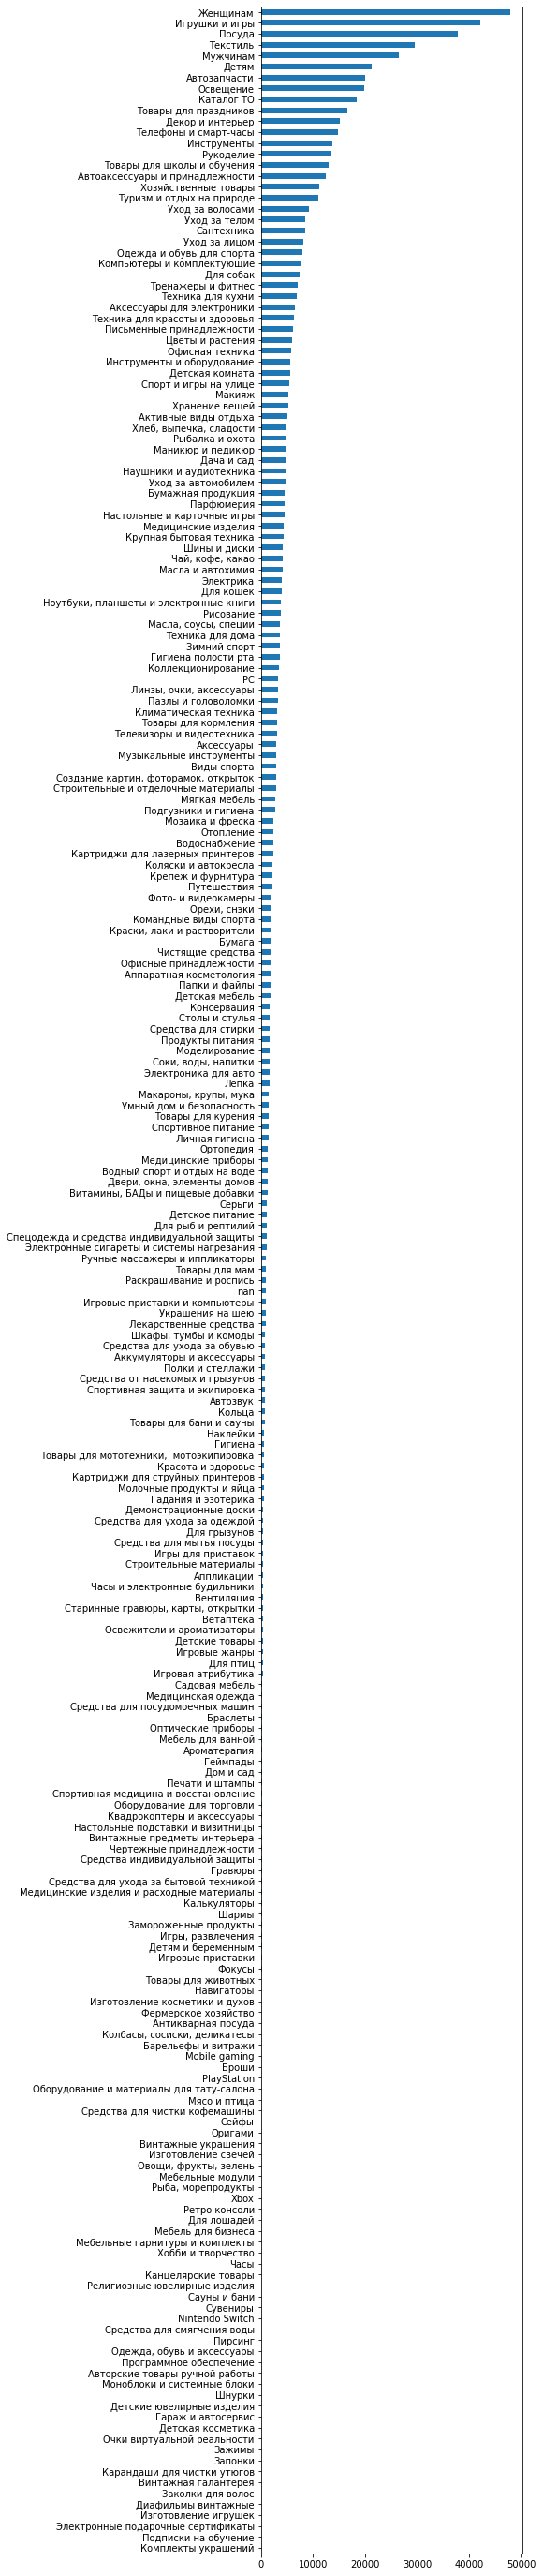

In [ ]:
df.cat_sub.value_counts(dropna=False, ascending=True).plot.barh(figsize=(5, 50), );

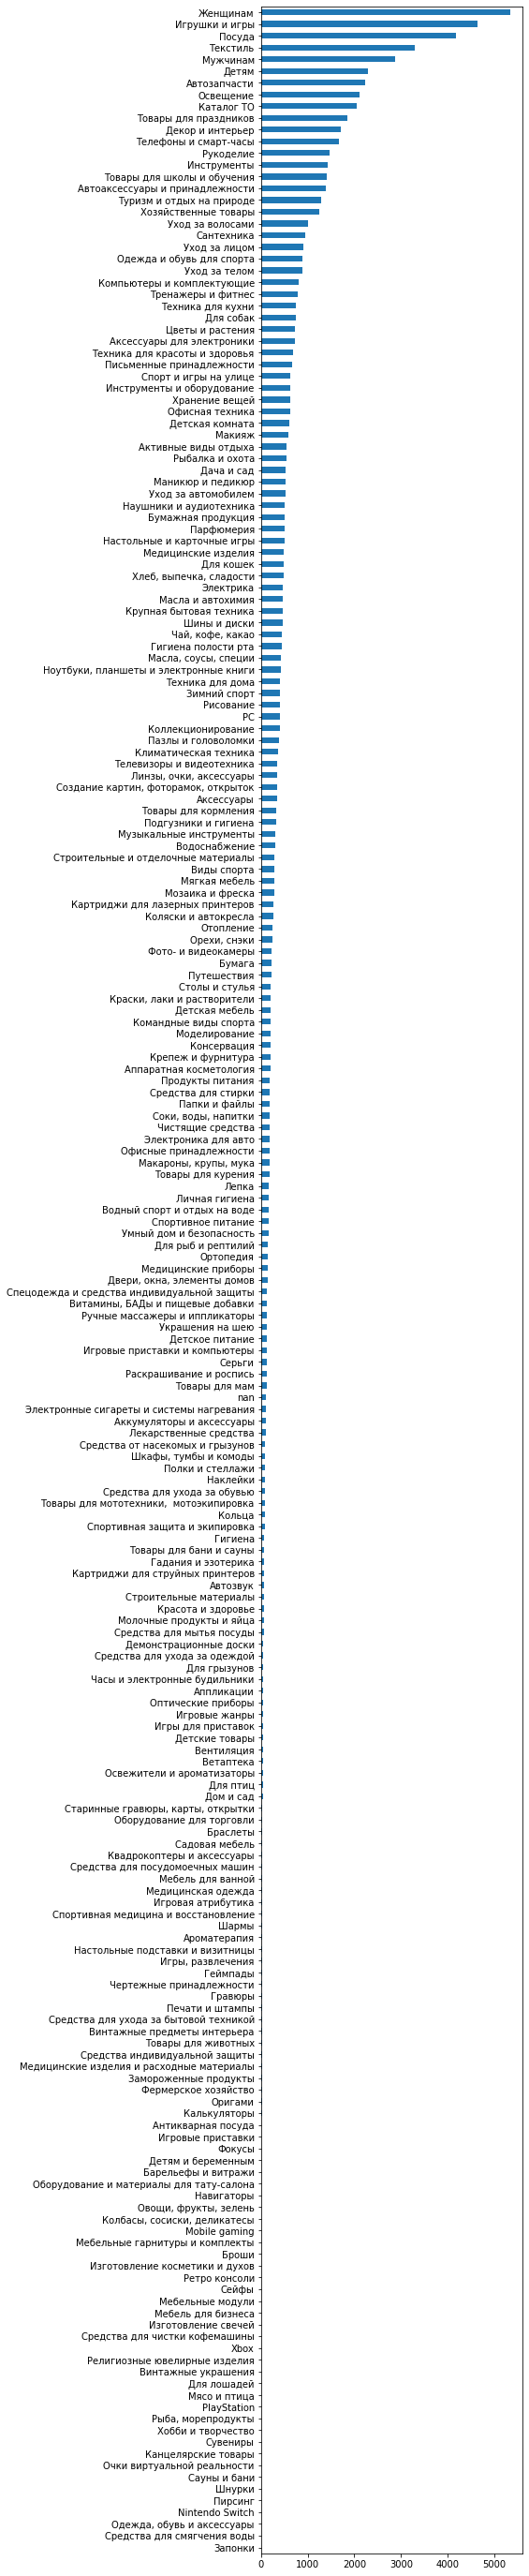

In [ ]:
dft.cat_sub.value_counts(dropna=False, ascending=True).plot.barh(figsize=(5, 50), );

In [ ]:
df.loc[df.groupby('cat_sub').Sales.transform('count')<1000, 'cat_sub'] = 'Rare'

In [ ]:
dft.loc[df.groupby('cat_sub').Sales.transform('count')<1000, 'cat_sub'] = 'Rare'

In [ ]:
df.groupby(['cat_sub'])['Sales'].max().sort_values(ascending=True)

cat_sub
Серьги                                     216.0
Детская мебель                             272.0
Коляски и автокресла                       331.0
Одежда и обувь для спорта                  662.0
Масла, соусы, специи                       690.0
Ноутбуки, планшеты и электронные книги     700.0
Краски, лаки и растворители                700.0
Крупная бытовая техника                    700.0
Линзы, очки, аксессуары                    700.0
Мозаика и фреска                           700.0
Водный спорт и отдых на воде               700.0
Парфюмерия                                 700.0
                                           ...  
Командные виды спорта                     2551.0
Rare                                      2789.0
Наушники и аудиотехника                   2791.0
Музыкальные инструменты                   2797.0
Тренажеры и фитнес                        2800.0
Игрушки и игры                            3389.0
Для собак                                 3479.0
Пазлы и голо

In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83531 entries, 0 to 83530
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              83531 non-null  int64  
 1   Name            83531 non-null  object 
 2   Category        83531 non-null  object 
 3   Brand           77602 non-null  object 
 4   Seller          83531 non-null  object 
 5   Deliveryscheme  83531 non-null  object 
 6   Comments        83531 non-null  int64  
 7   Rating          83531 non-null  float64
 8   Price           83531 non-null  float64
 9   Max price       83531 non-null  float64
 10  Min price       83531 non-null  float64
 11  Average price   75931 non-null  float64
 12  Days in stock   83531 non-null  float64
 13  cat_meta        83531 non-null  object 
 14  cat_sub         83424 non-null  object 
 15  cat_sub_sub     82462 non-null  object 
 16  3               75340 non-null  object 
 17  4               43242 non-null 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


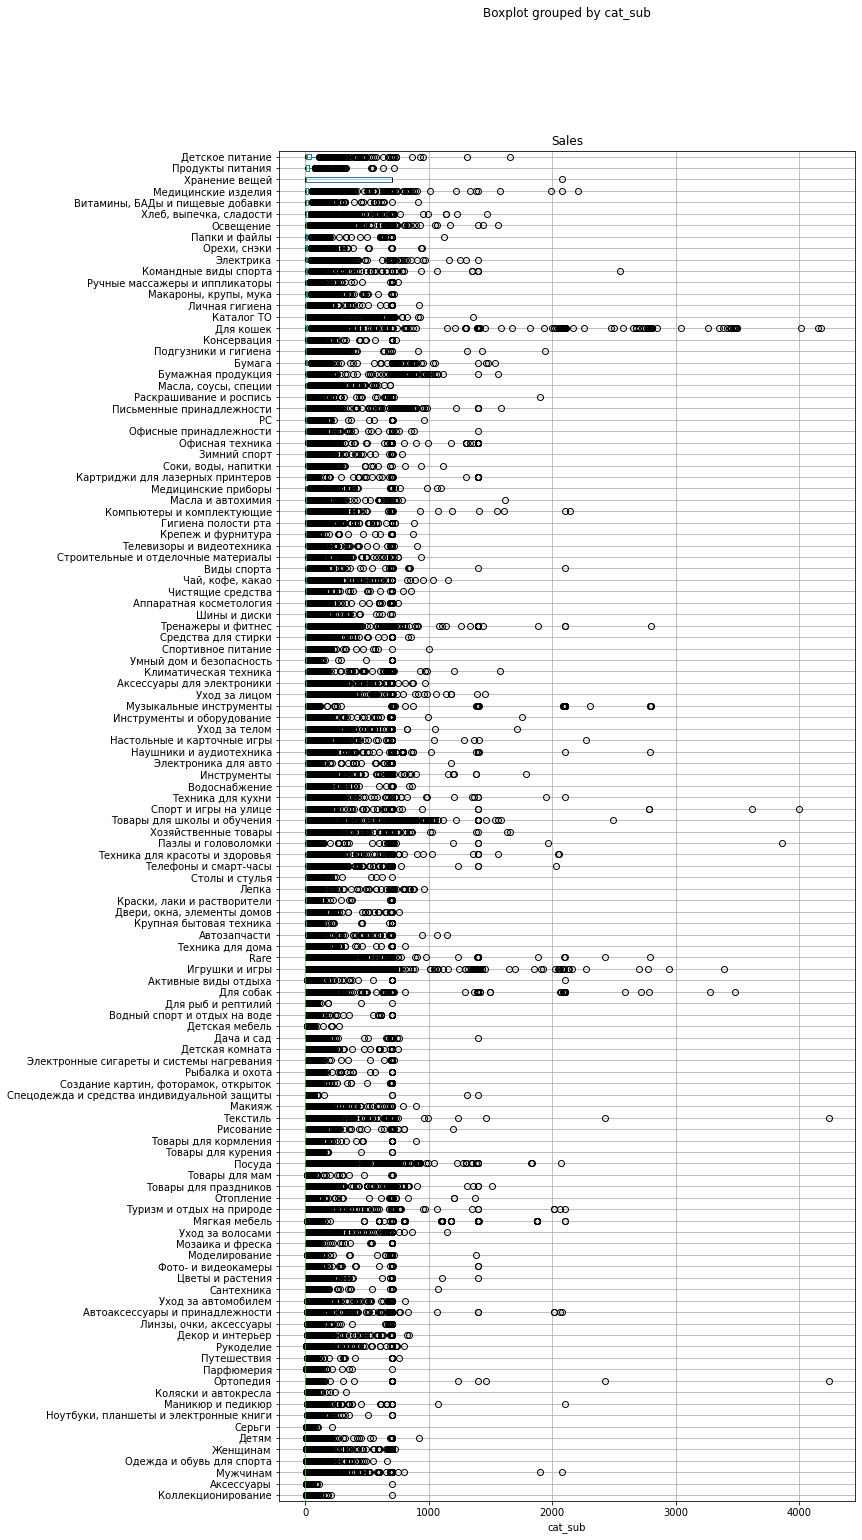

In [ ]:
t = df.groupby(['cat_sub'])['Sales'].median().sort_values(ascending=True)
df['cat_sub'] = df['cat_sub'].astype(pd.CategoricalDtype(list(t.index), ordered=True))
df.boxplot(column='Sales', by='cat_sub', figsize=(10, 25), vert=False);

In [ ]:
dft['cat_sub'] = dft['cat_sub'].astype(pd.CategoricalDtype(list(t.index), ordered=True))

In [ ]:
df.cat_sub_sub.value_counts(dropna=False)

Одежда                                   36126
Аксессуары                               29404
Обувь                                    13079
Аксессуары для смартфонов и телефонов     9601
NaN                                       9465
Развивающие игрушки и игры                8468
Постельное белье                          7983
Потолочные светильники                    6970
Фильтры для автомобилей                   6629
Посуда для приготовления                  6299
Нижнее белье                              5765
Настольные игры                           5697
                                         ...  
Компьютерные кресла                          1
Склад уникальных товаров                     1
ИГРУШКИ КИТАЙ                                1
Dragons                                      1
Фиделис                                      1
Ветеринарные паспорта                        1
Pigeon Corporation                           1
Я родился                                    1
TODA ALMA    

In [ ]:
dft.cat_sub_sub.value_counts(dropna=False)

Одежда                                   3987
Аксессуары                               3205
Обувь                                    1433
NaN                                      1069
Аксессуары для смартфонов и телефонов    1068
Развивающие игрушки и игры                963
Постельное белье                          870
Потолочные светильники                    747
Фильтры для автомобилей                   722
Посуда для приготовления                  706
Нижнее белье                              682
Настольные игры                           649
                                         ... 
Амуниция для лошадей                        1
Офисные принадлежности                      1
Клетки и ограждения                         1
Средства по уходу за больными               1
Бусы                                        1
HAMY                                        1
Женское здоровье                            1
Ирригаторы и аксессуары                     1
Наборы для создания слепков детски

In [ ]:
df[df.groupby('cat_sub_sub').Sales.transform('count')>1].Sales.value_counts(bins=25) #.cat_sub_sub.value_counts(dropna=False)

(-4.238, 169.48]      726330
(677.92, 847.4]         9447
(169.48, 338.96]        3420
(338.96, 508.44]        1056
(508.44, 677.92]         893
(847.4, 1016.88]         244
(1355.84, 1525.32]       230
(2033.76, 2203.24]       104
(1016.88, 1186.36]        78
(1186.36, 1355.84]        54
(1864.28, 2033.76]        29
(2711.68, 2881.16]        24
(1525.32, 1694.8]         19
(3389.6, 3559.08]         11
(2542.2, 2711.68]         11
(1694.8, 1864.28]          8
(2372.72, 2542.2]          6
(3220.12, 3389.6]          5
(2203.24, 2372.72]         5
(4067.52, 4237.0]          4
(3898.04, 4067.52]         2
(2881.16, 3050.64]         2
(3559.08, 3728.56]         1
(3728.56, 3898.04]         1
(3050.64, 3220.12]         0
Name: Sales, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


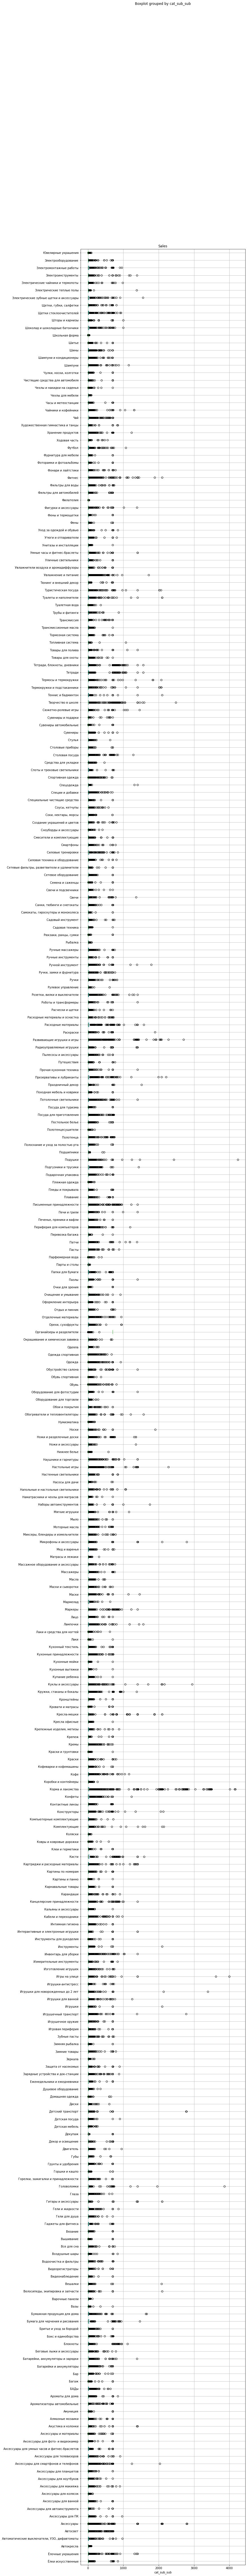

In [ ]:
df[df.groupby('cat_sub_sub').Sales.transform('count')>500]\
    .boxplot(column='Sales', by='cat_sub_sub', figsize=(10, 150), vert=False);

In [ ]:
df.Brand.value_counts(dropna=False)

NaN                 51708
Без бренда           4775
Xiaomi               3710
Декатлон             3143
Bondibon             2540
ТВОЕ                 2492
JoyArty              2243
Techshow             2061
Ambesonne            1783
adidas               1721
Arte Lamp            1576
Odeon Light          1555
                    ...  
Trafimet                1
WoodFlame               1
Bios Plus               1
Artemis                 1
HS                      1
AntiGravity             1
KAROLINA BABAYAN        1
TC Electronic           1
РОГНЕДА                 1
Brics                   1
Baci Lingerie           1
Marksman                1
Name: Brand, Length: 40729, dtype: int64

In [ ]:
df[df.groupby('Brand').Sales.transform('count')>1].Sales.value_counts(bins=15)#.cat_sub_sub.value_counts(dropna=False)

(-4.238, 282.467]       676942
(564.933, 847.4]          9519
(282.467, 564.933]        1826
(847.4, 1129.867]          283
(1129.867, 1412.333]       280
(1977.267, 2259.733]       102
(1412.333, 1694.8]          38
(2542.2, 2824.667]          34
(1694.8, 1977.267]          24
(3389.6, 3672.067]          11
(2259.733, 2542.2]          10
(3954.533, 4237.0]           6
(3107.133, 3389.6]           5
(2824.667, 3107.133]         3
(3672.067, 3954.533]         1
Name: Sales, dtype: int64

In [ ]:
df.loc[df.groupby('Brand').Sales.transform('count')<300, 'Brand'] = 'Rare'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751774 entries, 0 to 751773
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Name            751774 non-null  object  
 1   Category        751774 non-null  object  
 2   Brand           700066 non-null  object  
 3   Seller          751774 non-null  object  
 4   Deliveryscheme  751774 non-null  object  
 5   Comments        751774 non-null  int64   
 6   Rating          751774 non-null  object  
 7   Price           751774 non-null  float64 
 8   Max price       751774 non-null  float64 
 9   Min price       751774 non-null  float64 
 10  Average price   683438 non-null  float64 
 11  Days in stock   751774 non-null  object  
 12  Sales           751774 non-null  float64 
 13  cat_meta        751774 non-null  object  
 14  cat_sub         750820 non-null  category
 15  cat_sub_sub     742309 non-null  object  
 16  3               677955 non-null  objec

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


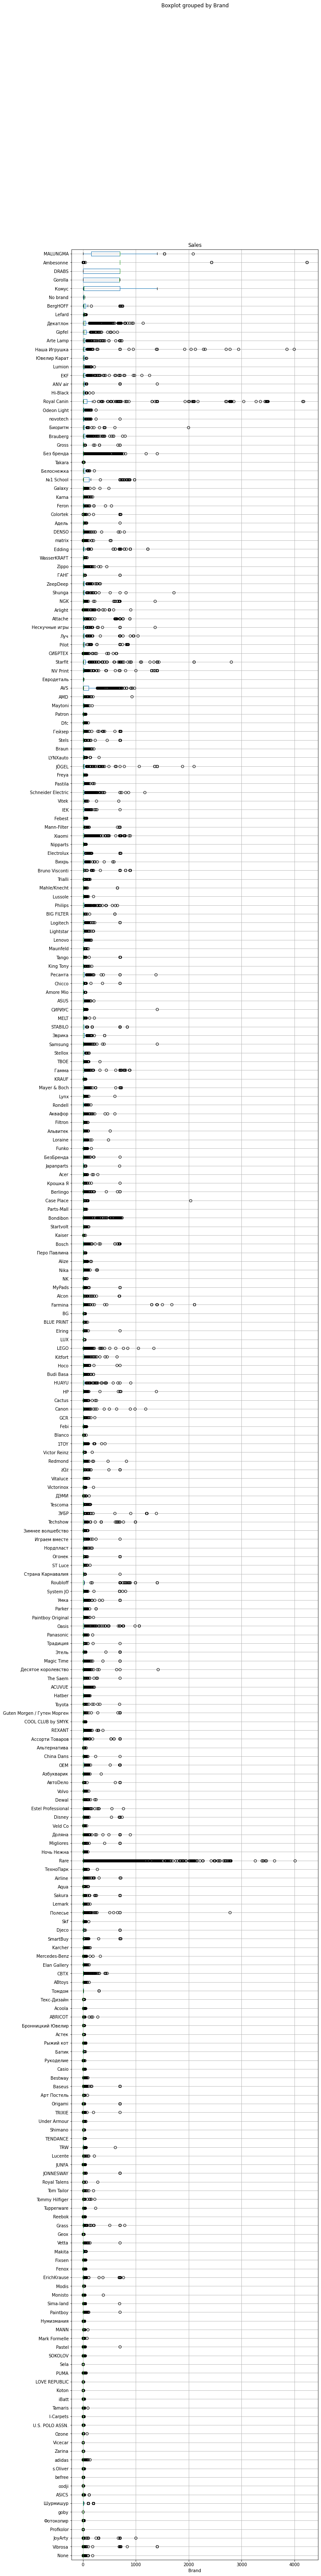

In [ ]:
t = df.groupby(['Brand'])['Sales'].median().sort_values()
df['Brand'] = df['Brand'].astype(pd.CategoricalDtype(list(t.index), ordered=True))

df.boxplot(column='Sales', by='Brand', figsize=(10, 100), vert=False);

Чистка данных


In [ ]:
# for i in df.select_dtypes('number').columns:
#     print(i, df[i].unique())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751774 entries, 0 to 751773
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Name            751774 non-null  object  
 1   Category        751774 non-null  object  
 2   Brand           700066 non-null  category
 3   Seller          751774 non-null  object  
 4   Deliveryscheme  751774 non-null  object  
 5   Comments        751774 non-null  int64   
 6   Rating          751774 non-null  object  
 7   Price           751774 non-null  float64 
 8   Max price       751774 non-null  float64 
 9   Min price       751774 non-null  float64 
 10  Average price   683438 non-null  float64 
 11  Days in stock   751774 non-null  object  
 12  Sales           751774 non-null  float64 
 13  cat_meta        751774 non-null  object  
 14  cat_sub         750820 non-null  category
 15  cat_sub_sub     742309 non-null  object  
 16  3               677955 non-null  objec

In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83531 entries, 0 to 83530
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Id              83531 non-null  int64   
 1   Name            83531 non-null  object  
 2   Category        83531 non-null  object  
 3   Brand           77602 non-null  object  
 4   Seller          83531 non-null  object  
 5   Deliveryscheme  83531 non-null  object  
 6   Comments        83531 non-null  int64   
 7   Rating          83531 non-null  float64 
 8   Price           83531 non-null  float64 
 9   Max price       83531 non-null  float64 
 10  Min price       83531 non-null  float64 
 11  Average price   75931 non-null  float64 
 12  Days in stock   83531 non-null  float64 
 13  cat_meta        83531 non-null  object  
 14  cat_sub         1462 non-null   category
 15  cat_sub_sub     82462 non-null  object  
 16  3               75340 non-null  object  
 17  4           

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751774 entries, 0 to 751773
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Name            751774 non-null  object  
 1   Category        751774 non-null  object  
 2   Brand           700066 non-null  category
 3   Seller          751774 non-null  object  
 4   Deliveryscheme  751774 non-null  object  
 5   Comments        751774 non-null  int64   
 6   Rating          751774 non-null  object  
 7   Price           751774 non-null  float64 
 8   Max price       751774 non-null  float64 
 9   Min price       751774 non-null  float64 
 10  Average price   683438 non-null  float64 
 11  Days in stock   751774 non-null  object  
 12  Sales           751774 non-null  float64 
 13  cat_meta        751774 non-null  object  
 14  cat_sub         750820 non-null  category
 15  cat_sub_sub     742309 non-null  object  
 16  3               677955 non-null  objec

In [ ]:
df_nan = df[[ 'Price', 'Brand', 'cat_meta', 'cat_sub', 'Max price', 'Min price', 'Average price', 
             'Deliveryscheme', 'Comments', 'Days in stock', 'Rating', 'Sales']].copy()

df_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751774 entries, 0 to 751773
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Name            751774 non-null  object  
 1   Price           751774 non-null  float64 
 2   Brand           700066 non-null  category
 3   cat_meta        751774 non-null  object  
 4   cat_sub         750820 non-null  category
 5   cat_sub_sub     742309 non-null  object  
 6   Max price       751774 non-null  float64 
 7   Min price       751774 non-null  float64 
 8   Average price   683438 non-null  float64 
 9   Deliveryscheme  751774 non-null  object  
 10  Comments        751774 non-null  int64   
 11  Days in stock   751774 non-null  object  
 12  Rating          751774 non-null  object  
 13  Seller          751774 non-null  object  
 14  Sales           751774 non-null  float64 
dtypes: category(2), float64(5), int64(1), object(7)
memory usage: 76.7+ MB


In [ ]:
dft_nan = dft[['Price', 'Brand', 'cat_meta', 'cat_sub', 'Max price', 'Min price', 'Average price', 
             'Deliveryscheme', 'Comments', 'Days in stock', 'Rating']].copy()

dft_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83531 entries, 0 to 83530
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Price           83531 non-null  float64 
 1   Brand           77602 non-null  object  
 2   cat_meta        83531 non-null  object  
 3   cat_sub         1462 non-null   category
 4   Max price       83531 non-null  float64 
 5   Min price       83531 non-null  float64 
 6   Average price   75931 non-null  float64 
 7   Deliveryscheme  83531 non-null  object  
 8   Comments        83531 non-null  int64   
 9   Days in stock   83531 non-null  float64 
 10  Rating          83531 non-null  float64 
dtypes: category(1), float64(6), int64(1), object(3)
memory usage: 7.2+ MB


In [ ]:
df_nan.isna().any()

Name              False
Price             False
Brand              True
cat_meta          False
cat_sub            True
cat_sub_sub        True
Max price         False
Min price         False
Average price      True
Deliveryscheme    False
Comments          False
Days in stock     False
Rating            False
Seller            False
Sales             False
dtype: bool

In [ ]:
dft_nan.isna().any()

Price             False
Brand              True
cat_meta          False
cat_sub            True
Max price         False
Min price         False
Average price      True
Deliveryscheme    False
Comments          False
Days in stock     False
Rating            False
dtype: bool

In [ ]:
df_nan[df_nan.isna().any(axis=1)]#.style.highlight_null()

Name  ...  Sales
7                  Ботинки NNN TISA SPORT LADY S80519, 39  ...    2.0
19      3D Экспресс скульптор "PinART" Размер 25см*20с...  ...    7.0
20                     Силиконовый чехол на ключ BMW хром  ...    0.0
30                           Валик 180 мм matrix NM-80880  ...    0.0
41                Разбрызгиватель GARDENA 02062-20.000.00  ...    0.0
42                                        Машина пожарная  ...    3.0
51      Смеситель Haiba HB2209, для ванны, двуручковый...  ...    0.0
54      Машинка инерционная джип, с открывающимися две...  ...    1.0
55                                     Скатерть 140x150см  ...   13.0
60                        Электрическая плитка Злата-214Т  ...    0.0
65      Обучающий плакат А2 (картон) "Азбука" + наклей...  ...    5.0
78      Универсальный чехол-накидка на автокресло "Моз...  ...    0.0
...                                                   ...  ...    ...
751714  Журнал бракеража готовой кулинарной продукции ...  ...    0.0
751716             Ручка шариковая PIERRE CARDIN PCX752BP  ...    0.0
751727        Гибкий шланг-насадка на кран Turbo Flex 360  ...    8.0
751733  Тонер-картридж Cactus CS-TN2080, черный, для л...  ...    2.0
751738           Качели детские Ветерок Люкс Globex Синие  ...    6.0
751740  Фигурные текстовыделители, Kids Fantasy, 2 шту...  ...  700.0
751742  Набор текстовыделителей SCHNEIDER 6 шт., АССОР...  ...    7.0
751745                                       Трусы  слипы  ...    4.0
751751    Задняя крышка для Alcatel OT 8050D (Idol 4 6.0)  ...    0.0
751761                          Набор для контактных линз  ...   12.0
751766                             Чемодан детский, 45 см  ...    2.0
751769                          Кольцо SOKOLOV из серебра  ...    0.0

[122853 rows x 15 columns]

In [ ]:
dft_nan[dft_nan.isna().any(axis=1)]#.style.highlight_null()

Price               Brand  ... Days in stock Rating
0      4888.0             ST Luce  ...          29.0   0.00
2      1577.0            MALUNGMA  ...          15.0   0.00
3       318.0              ArtFox  ...          15.0   0.00
4      3400.0             KANZLER  ...           4.0   0.00
5      4203.0               Polar  ...           6.0   0.00
6      9459.0                 NaN  ...          31.0   0.00
7       298.0  Ollin Professional  ...          31.0   4.67
8       174.0              CARGEN  ...          20.0   0.00
9       497.0             Оргтиум  ...          10.0   3.67
10     2775.0            Аргумент  ...          31.0   0.00
11     7888.0         DECOR MAGIC  ...          31.0   0.00
12     4134.0   GREG aus Russland  ...          18.0   0.00
...       ...                 ...  ...           ...    ...
83519   304.0             LAVISCO  ...          28.0   0.00
83520  1611.0        Чистый котик  ...           0.0   4.50
83521  4918.0               VALEO  ...          16.0   0.00
83522   652.0                 NaN  ...          26.0   5.00
83523  1039.0              Baseus  ...           1.0   0.00
83524  2882.0               Sanko  ...          18.0   0.00
83525  2650.0            Richcoco  ...          27.0   0.00
83526   417.0               Milan  ...          29.0   0.00
83527   825.0       Infolio Study  ...          15.0   0.00
83528  1650.0              Xiaomi  ...          10.0   0.00
83529  1820.0               KRAUF  ...          30.0   0.00
83530   935.0            Michelle  ...           2.0   4.40

[82297 rows x 11 columns]

In [ ]:
df_nan['Average price'].fillna((df_nan['Max price']+df_nan['Min price']) / 2, inplace=True)

In [ ]:
dft_nan['Average price'].fillna((dft_nan['Max price']+dft_nan['Min price']) / 2, inplace=True)

In [ ]:
df_nan.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
dft_nan.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751774 entries, 0 to 751773
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Name            751774 non-null  object  
 1   Price           751774 non-null  float64 
 2   Brand           700066 non-null  category
 3   cat_meta        751774 non-null  object  
 4   cat_sub         750820 non-null  category
 5   cat_sub_sub     742309 non-null  object  
 6   Max price       751774 non-null  float64 
 7   Min price       751774 non-null  float64 
 8   Average price   751774 non-null  float64 
 9   Deliveryscheme  751774 non-null  object  
 10  Comments        751774 non-null  int64   
 11  Days in stock   751774 non-null  object  
 12  Rating          751774 non-null  object  
 13  Seller          751774 non-null  object  
 14  Sales           751774 non-null  float64 
dtypes: category(2), float64(5), int64(1), object(7)
memory usage: 76.7+ MB


In [ ]:
df_nan = df_nan.drop(columns=['Max price', 'Min price', 'Average price'])

In [ ]:
dft_nan = dft_nan.drop(columns=['Max price', 'Min price', 'Average price'])

In [ ]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751771 entries, 0 to 751773
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Price           751771 non-null  float64 
 1   Brand           700063 non-null  category
 2   cat_meta        751771 non-null  object  
 3   cat_sub         750820 non-null  category
 4   Deliveryscheme  751771 non-null  object  
 5   Comments        751771 non-null  int64   
 6   Days in stock   751771 non-null  float64 
 7   Rating          751771 non-null  float64 
 8   Sales           751771 non-null  float64 
dtypes: category(2), float64(4), int64(1), object(2)
memory usage: 48.1+ MB


In [ ]:
dft_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83531 entries, 0 to 83530
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Price           83531 non-null  float64 
 1   Brand           77602 non-null  object  
 2   cat_meta        83531 non-null  object  
 3   cat_sub         1462 non-null   category
 4   Deliveryscheme  83531 non-null  object  
 5   Comments        83531 non-null  int64   
 6   Days in stock   83531 non-null  float64 
 7   Rating          83531 non-null  float64 
dtypes: category(1), float64(3), int64(1), object(3)
memory usage: 5.3+ MB


One-hoting

In [ ]:
df_one_hoted = df_nan.copy()

ONE_HOT_COL = ['Deliveryscheme'] #, 'Brand', 'cat_meta', 'cat_sub'

temp = pd.get_dummies(df_one_hoted[ONE_HOT_COL], prefix=ONE_HOT_COL, dtype=bool)

df_one_hoted = pd.concat([temp, df_one_hoted.select_dtypes('number'), 
                            df_one_hoted.select_dtypes('bool')], axis=1)

df_nan.shape, df_one_hoted.shape

((751774, 15), (751774, 272))

In [ ]:
df_one_hoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751774 entries, 0 to 751773
Columns: 272 entries, Brand_None to Sales
dtypes: bool(266), float64(5), int64(1)
memory usage: 225.1 MB


In [ ]:
dft_one_hoted = dft_nan.copy()

ONE_HOT_COLt = ['Deliveryscheme'] #, 'Brand', 'cat_meta', 'cat_sub'

tempt = pd.get_dummies(dft_one_hoted[ONE_HOT_COLt], prefix=ONE_HOT_COLt, dtype=bool)

dft_one_hoted = pd.concat([tempt, dft_one_hoted.select_dtypes('number'), 
                            dft_one_hoted.select_dtypes('bool')], axis=1)

dft_nan.shape, dft_one_hoted.shape

((83531, 8), (83531, 8))

In [ ]:
df_one_hoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751774 entries, 0 to 751773
Columns: 272 entries, Brand_None to Sales
dtypes: bool(266), float64(5), int64(1)
memory usage: 225.1 MB


In [ ]:
dft_one_hoted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83531 entries, 0 to 83530
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deliveryscheme_Cross   83531 non-null  bool   
 1   Deliveryscheme_FBO     83531 non-null  bool   
 2   Deliveryscheme_FBS     83531 non-null  bool   
 3   Deliveryscheme_Retail  83531 non-null  bool   
 4   Price                  83531 non-null  float64
 5   Comments               83531 non-null  int64  
 6   Days in stock          83531 non-null  float64
 7   Rating                 83531 non-null  float64
dtypes: bool(4), float64(3), int64(1)
memory usage: 3.5 MB


Создание модели

In [ ]:
from sklearn.model_selection import train_test_split


df_sampled = df_one_hoted.sample(750_000)

X_train, X_test, y_train, y_test = train_test_split(df_sampled.drop(columns='Sales'), df_sampled.Sales)

In [ ]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750000 entries, 231336 to 727456
Columns: 272 entries, Brand_None to Sales
dtypes: bool(266), float64(5), int64(1)
memory usage: 230.3 MB


In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


model = RandomForestRegressor(n_jobs=-1, max_depth=16)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(f'MAE train: {mean_absolute_error(y_train, y_pred_train)}, MAE test: {mean_absolute_error(y_test, y_pred_test)}')
print(f'MSE train: {mean_squared_error(y_train, y_pred_train)}, MSE test: {mean_squared_error(y_test, y_pred_test)}')
print(f'MAPE train: {mean_absolute_percentage_error(y_train, y_pred_train)}, MAPE test: {mean_absolute_percentage_error(y_test, y_pred_test)}')

MAE train: 23.333608854648062, MAE test: 23.841048337501338
MSE train: 6919.51771662581, MSE test: 7484.832132711176
MAPE train: 8874937719460503.0, MAPE test: 9117747501898208.0
CPU times: user 29min 28s, sys: 1.86 s, total: 29min 30s
Wall time: 7min 42s


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
from catboost import Pool, CatBoostRegressor
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

# specify the training parameters 
modelC = CatBoostRegressor(iterations=1000, 
                          learning_rate=0.2,
                          task_type="GPU",
                          devices='0:1', 
                          custom_metric='MAE')
#train the model
modelC.fit(train_pool,eval_set=test_pool,verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
y_pred_trainc = modelC.predict(X_train)
y_pred_testc = modelC.predict(X_test)

print(f'MAE train: {mean_absolute_error(y_train, y_pred_trainc)}, MAE test: {mean_absolute_error(y_test, y_pred_testc)}')
print(f'MSE train: {mean_squared_error(y_train, y_pred_trainc)}, MSE test: {mean_squared_error(y_test, y_pred_testc)}')
print(f'MAPE train: {mean_absolute_percentage_error(y_train, y_pred_trainc)}, MAPE test: {mean_absolute_percentage_error(y_test, y_pred_testc)}')

MAE train: 23.422498292265093, MAE test: 23.985107210450952
MSE train: 6854.414073258829, MSE test: 7531.444622205418
MAPE train: 8858126770168639.0, MAPE test: 9174729243969312.0


In [ ]:
pred_total = modelC.predict(dft_one_hoted)

In [ ]:
pred_total2 = model.predict(dft_one_hoted)

In [ ]:
pred_total2.size

83531

In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83531 entries, 0 to 83530
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        83531 non-null  int64  
 1   Expected  83531 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.3 MB


In [ ]:
dfs = dfs.rename(columns={'Expected': 'Exp'})

In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83531 entries, 0 to 83530
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      83531 non-null  int64  
 1   Exp     83531 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.3 MB


In [ ]:
dfs['Expected'] = pred_total2

In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83531 entries, 0 to 83530
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        83531 non-null  int64  
 1   Exp       83531 non-null  float64
 2   Expected  83531 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.9 MB


In [ ]:
pred_total2[83530]

15.972319595723134

In [ ]:
dfs = dfs.drop('Exp', 1)

In [ ]:
dfs

Id   Expected
0          0   8.131101
1          1  27.297730
2          2  19.210583
3          3  26.543354
4          4   1.565500
5          5   1.784220
6          6   5.522784
7          7  15.014696
8          8  32.243469
9          9   5.729876
10        10   1.803958
11        11   5.573035
...      ...        ...
83519  83519   2.994088
83520  83520   2.942919
83521  83521  13.086872
83522  83522   4.774507
83523  83523   1.265063
83524  83524  12.762971
83525  83525  14.335769
83526  83526   2.905293
83527  83527  16.910540
83528  83528  20.012508
83529  83529   8.802272
83530  83530  15.972320

[83531 rows x 2 columns]

In [ ]:
file_name = '/content/drive/MyDrive/nsu-abmd-2021-e-commerce/submission2.csv'

In [ ]:
dfs.to_csv(file_name, encoding='utf-8', index=False)

In [ ]:
list(zip(y_pred_train, y_train))

[(9.986920960606877, 10.0),
 (11.837626637881595, 7.0),
 (14.942729752013234, 7.0),
 (9.734314682725772, 5.0),
 (9.31061220651514, 11.0),
 (11.266967272696805, 1.0),
 (2.7379968827220553, 1.0),
 (19.63829425696467, 15.0),
 (1.801663155281263, 0.0),
 (16.052055515957324, 6.0),
 (8.834189830402423, 2.0),
 (1.633693010656521, 5.0),
 (42.546600936221594, 2.0),
 (6.383900354451031, 1.0),
 (7.644605373692775, 10.0),
 (18.369635612239026, 1.0),
 (16.43224067159361, 7.0),
 (8.45414136896078, 0.0),
 (11.799102900620468, 1.0),
 (282.1842372386785, 700.0),
 (8.887224274630809, 13.0),
 (6.470713245667358, 0.0),
 (27.844653868837867, 3.0),
 (16.63973973777926, 1.0),
 (8.187197578677898, 2.0),
 (12.672293840047416, 1.0),
 (1.3463056817434764, 0.0),
 (11.580595592047148, 20.0),
 (14.214487342666342, 10.0),
 (14.720251909583558, 9.0),
 (5.508000763079263, 1.0),
 (9.80130189912335, 1.0),
 (10.110787594995946, 10.0),
 (245.73130448378328, 700.0),
 (6.479660276893417, 15.0),
 (11.232555254895432, 9.0),
 

In [ ]:
(y_pred_train - y_train).value_counts(bins=25)#.hist(bins=100)

(-19.356, 40.146]         6681
(-78.859, -19.356]         317
(40.146, 99.648]           285
(-138.361, -78.859]         45
(99.648, 159.15]            32
(-614.379, -554.877]        20
(-316.868, -257.365]        17
(-197.863, -138.361]        15
(-554.877, -495.374]        15
(-495.374, -435.872]        13
(159.15, 218.653]           11
(-376.37, -316.868]         10
(-435.872, -376.37]          9
(-673.881, -614.379]         8
(-257.365, -197.863]         6
(218.653, 278.155]           5
(278.155, 337.657]           3
(-852.388, -792.886]         3
(-733.383, -673.881]         2
(-971.392, -911.89]          1
(337.657, 397.159]           1
(-1091.885, -1030.895]       1
(-911.89, -852.388]          0
(-792.886, -733.383]         0
(-1030.895, -971.392]        0
Name: Sales, dtype: int64

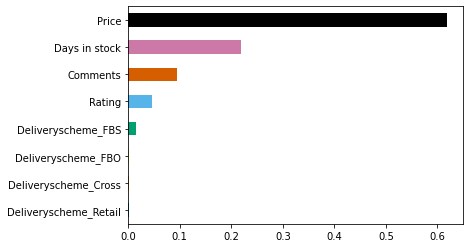

In [ ]:
from bokeh.palettes import Colorblind8

pd.Series(model.feature_importances_, index=X_test.columns)\
    .sort_values()[-20:].plot.barh(color=Colorblind8);

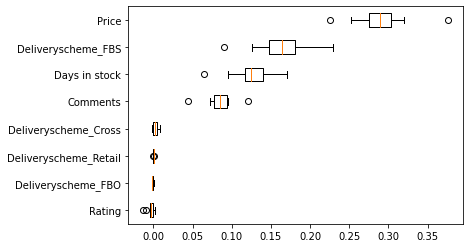

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance


result = permutation_importance(model, X_test, y_test, n_repeats=10, n_jobs=-1)

sorted_idx = result.importances_mean.argsort()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx]);

In [ ]:
from sklearn.feature_selection import RFE


rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_test, y_test)

pd.DataFrame({'support': rfe.support_, 'rank': rfe.ranking_}, index=X_test.columns).sort_values(by='rank')

support  rank
Deliveryscheme_FBS        True     1
Price                     True     1
Comments                  True     1
Days in stock             True     1
Rating                    True     1
Deliveryscheme_FBO       False     2
Deliveryscheme_Retail    False     3
Deliveryscheme_Cross     False     4